In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_censo = pd.read_csv(r'data\microdados_censo_escolar_2023\dados\microdados_ed_basica_2023.csv',sep=';',encoding='latin1')

C:\Users\andre\AppData\Local\Temp\ipykernel_11168\72805233.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_censo = pd.read_csv(r'data\microdados_censo_escolar_2023\dados\microdados_ed_basica_2023.csv',sep=';',encoding='latin1')


In [12]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217625 entries, 0 to 217624
Columns: 408 entries, NU_ANO_CENSO to QT_TUR_MED_INT
dtypes: float64(378), int64(14), object(16)
memory usage: 677.4+ MB


In [18]:
for i in df_censo.columns:
    print(i)

NU_ANO_CENSO
NO_REGIAO
CO_REGIAO
NO_UF
SG_UF
CO_UF
NO_MUNICIPIO
CO_MUNICIPIO
NO_REGIAO_GEOG_INTERM
CO_REGIAO_GEOG_INTERM
NO_REGIAO_GEOG_IMED
CO_REGIAO_GEOG_IMED
NO_MESORREGIAO
CO_MESORREGIAO
NO_MICRORREGIAO
CO_MICRORREGIAO
CO_DISTRITO
NO_ENTIDADE
CO_ENTIDADE
TP_DEPENDENCIA
TP_CATEGORIA_ESCOLA_PRIVADA
TP_LOCALIZACAO
TP_LOCALIZACAO_DIFERENCIADA
DS_ENDERECO
NU_ENDERECO
DS_COMPLEMENTO
NO_BAIRRO
CO_CEP
NU_DDD
NU_TELEFONE
TP_SITUACAO_FUNCIONAMENTO
CO_ORGAO_REGIONAL
DT_ANO_LETIVO_INICIO
DT_ANO_LETIVO_TERMINO
IN_VINCULO_SECRETARIA_EDUCACAO
IN_VINCULO_SEGURANCA_PUBLICA
IN_VINCULO_SECRETARIA_SAUDE
IN_VINCULO_OUTRO_ORGAO
IN_PODER_PUBLICO_PARCERIA
TP_PODER_PUBLICO_PARCERIA
IN_FORMA_CONT_TERMO_COLABORA
IN_FORMA_CONT_TERMO_FOMENTO
IN_FORMA_CONT_ACORDO_COOP
IN_FORMA_CONT_PRESTACAO_SERV
IN_FORMA_CONT_COOP_TEC_FIN
IN_FORMA_CONT_CONSORCIO_PUB
IN_FORMA_CONT_MU_TERMO_COLAB
IN_FORMA_CONT_MU_TERMO_FOMENTO
IN_FORMA_CONT_MU_ACORDO_COOP
IN_FORMA_CONT_MU_PREST_SERV
IN_FORMA_CONT_MU_COOP_TEC_FIN
IN_FORMA_CONT_MU

In [11]:
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_REGIAO_GEOG_INTERM,CO_REGIAO_GEOG_INTERM,...,QT_TUR_BAS_D,QT_TUR_BAS_N,QT_TUR_BAS_EAD,QT_TUR_INF_INT,QT_TUR_INF_CRE_INT,QT_TUR_INF_PRE_INT,QT_TUR_FUND_INT,QT_TUR_FUND_AI_INT,QT_TUR_FUND_AF_INT,QT_TUR_MED_INT
0,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,14.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,Norte,1,Rondônia,RO,11,Porto Velho,1100205,Porto Velho,1101,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


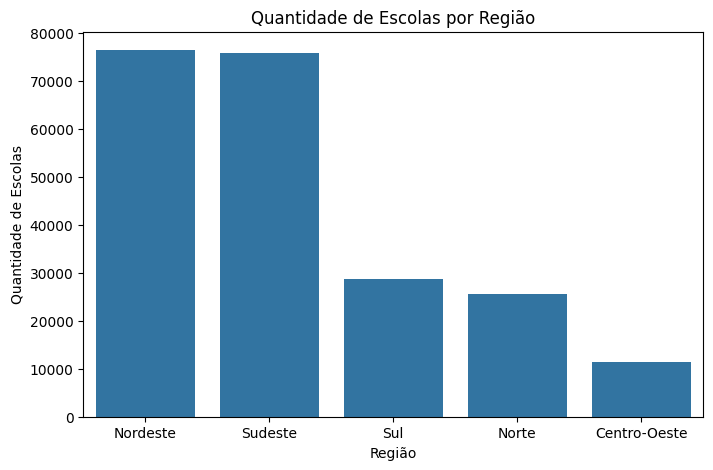

In [20]:
# ----------------------------------------
# 1. Quantidade de Escolas por Região
# ----------------------------------------
regiao_counts = df_censo['NO_REGIAO'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=regiao_counts.index, y=regiao_counts.values)
plt.title('Quantidade de Escolas por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Escolas')
plt.show()

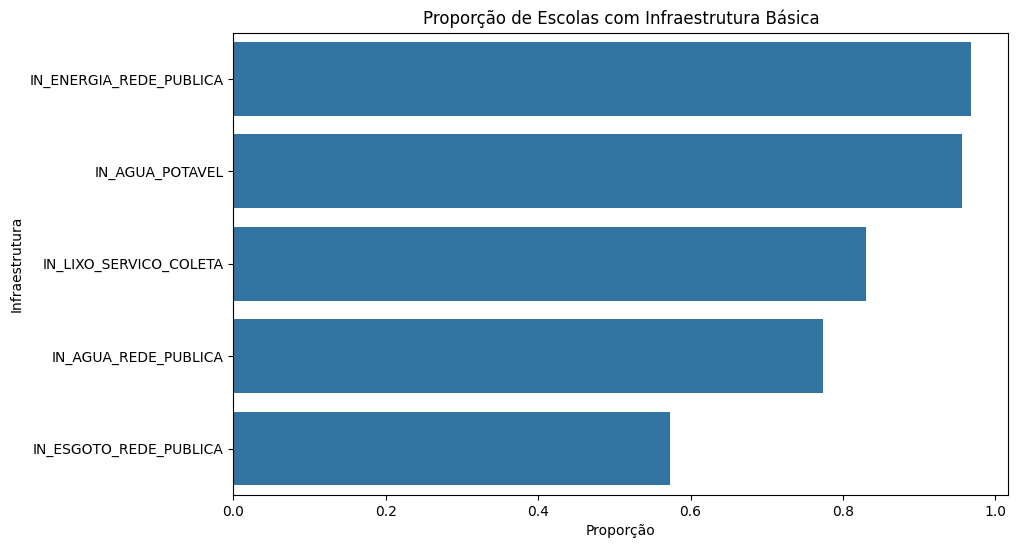

In [22]:
# ----------------------------------------
# 2. Infraestrutura de Saneamento Básico
# ----------------------------------------
infra_features = [
    'IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA', 
    'IN_ESGOTO_REDE_PUBLICA', 'IN_LIXO_SERVICO_COLETA'
]

infra_counts = df_censo[infra_features].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=infra_counts.values, y=infra_counts.index)
plt.title('Proporção de Escolas com Infraestrutura Básica')
plt.xlabel('Proporção')
plt.ylabel('Infraestrutura')
plt.show()

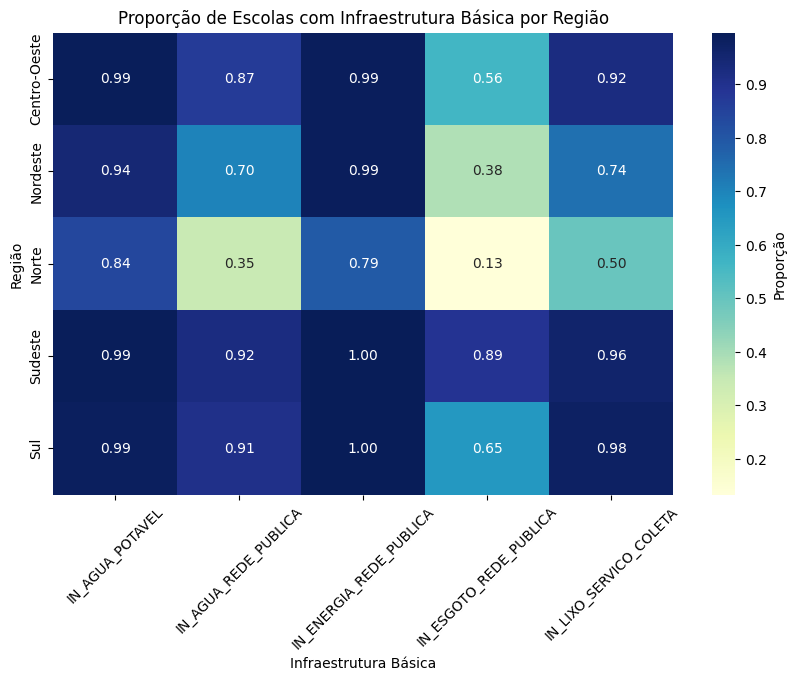

In [32]:
# Selecione as colunas de interesse e a coluna da região
infra_features = [
    'IN_AGUA_POTAVEL', 'IN_AGUA_REDE_PUBLICA', 'IN_ENERGIA_REDE_PUBLICA', 
    'IN_ESGOTO_REDE_PUBLICA', 'IN_LIXO_SERVICO_COLETA'
]

# Agrupando os dados por região para calcular a média de infraestrutura básica
# Supondo que 'REGIAO' é o nome da coluna que indica a região da escola
infra_por_regiao = df_censo.groupby('NO_REGIAO')[infra_features].mean()

# Configuração do gráfico heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(infra_por_regiao, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Proporção'})

# Configuração dos títulos e rótulos do gráfico
plt.title('Proporção de Escolas com Infraestrutura Básica por Região')
plt.xlabel('Infraestrutura Básica')
plt.ylabel('Região')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.show()

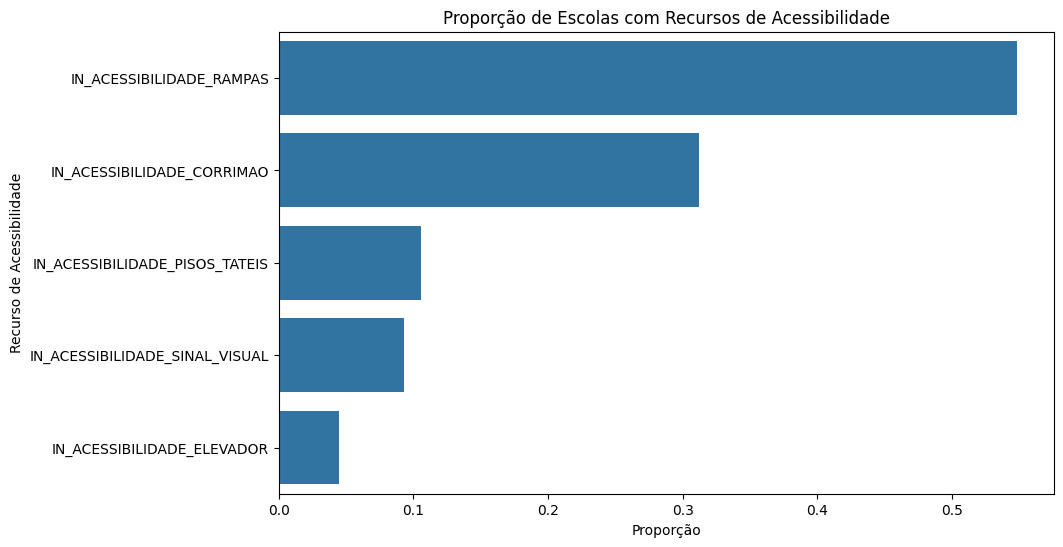

In [23]:
# ----------------------------------------
# 3. Acessibilidade nas Escolas
# ----------------------------------------
acessibilidade_cols = [
    'IN_ACESSIBILIDADE_CORRIMAO', 'IN_ACESSIBILIDADE_ELEVADOR', 
    'IN_ACESSIBILIDADE_PISOS_TATEIS', 'IN_ACESSIBILIDADE_RAMPAS', 
    'IN_ACESSIBILIDADE_SINAL_VISUAL'
]

acessibilidade_counts = df_censo[acessibilidade_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=acessibilidade_counts.values, y=acessibilidade_counts.index)
plt.title('Proporção de Escolas com Recursos de Acessibilidade')
plt.xlabel('Proporção')
plt.ylabel('Recurso de Acessibilidade')
plt.show()

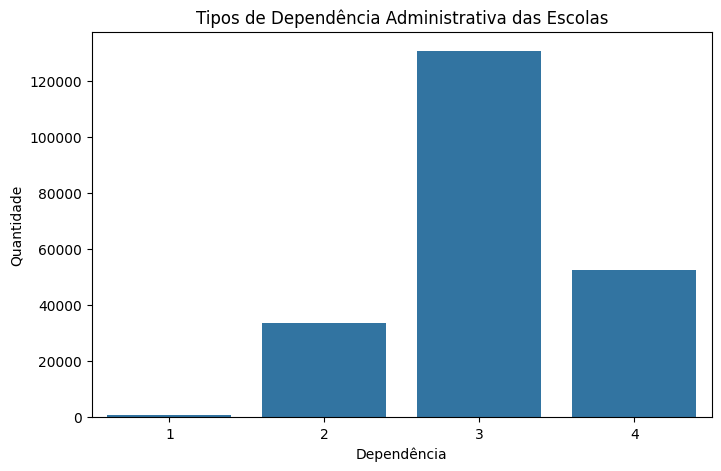

In [25]:
# ----------------------------------------
# 4. Tipos de Dependência Administrativa
# ----------------------------------------
dependencia_counts = df_censo['TP_DEPENDENCIA'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=dependencia_counts.index, y=dependencia_counts.values)
plt.title('Tipos de Dependência Administrativa das Escolas')
plt.xlabel('Dependência')
plt.ylabel('Quantidade')
plt.show()

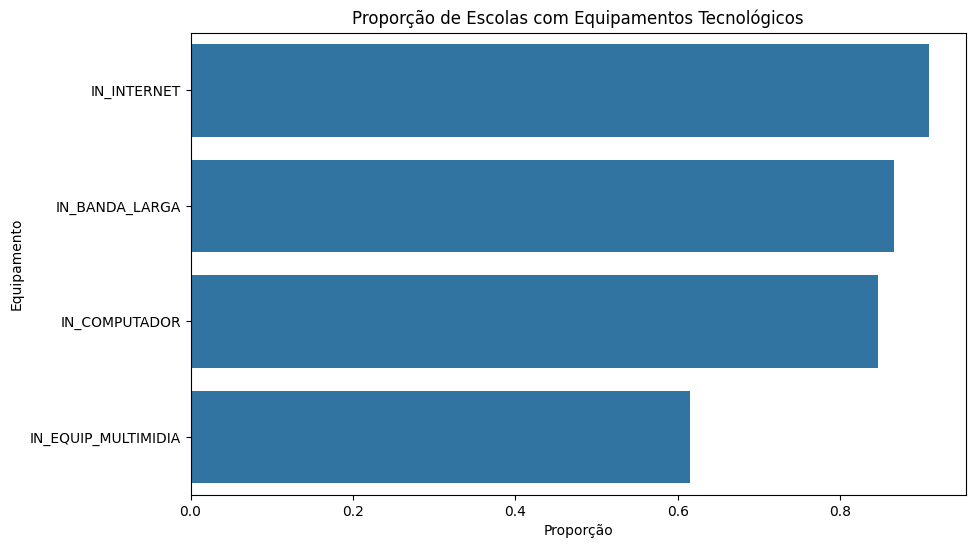

In [26]:
# ----------------------------------------
# 5. Distribuição de Escolas com Tecnologia (Computador, Internet, etc.)
# ----------------------------------------
tecnologia_features = [
    'IN_COMPUTADOR', 'IN_INTERNET', 'IN_BANDA_LARGA', 'IN_EQUIP_MULTIMIDIA'
]

tecnologia_counts = df_censo[tecnologia_features].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=tecnologia_counts.values, y=tecnologia_counts.index)
plt.title('Proporção de Escolas com Equipamentos Tecnológicos')
plt.xlabel('Proporção')
plt.ylabel('Equipamento')
plt.show()

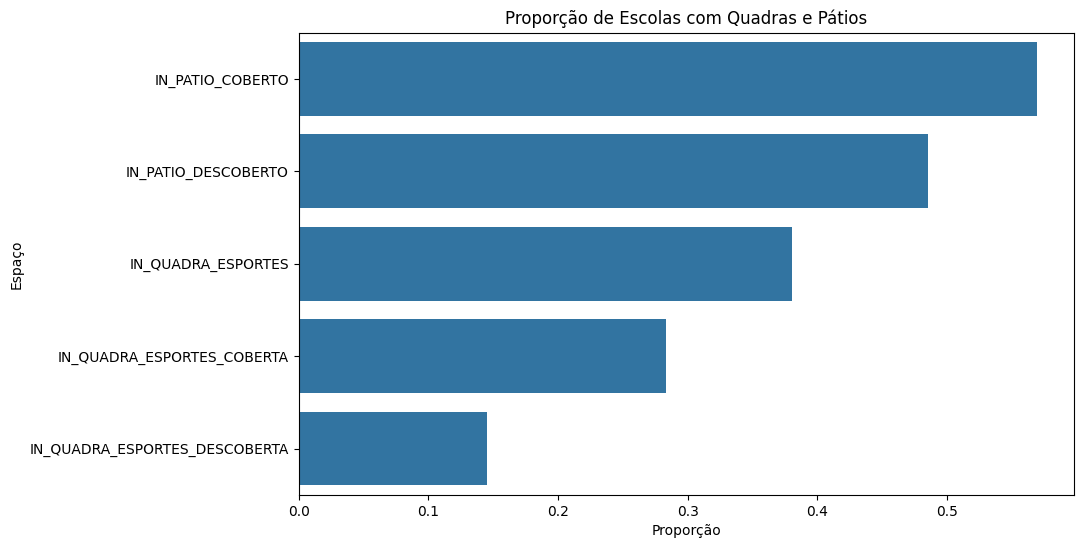

In [27]:
# ----------------------------------------
# 6. Distribuição de Escolas com Quadras e Pátios
# ----------------------------------------
quadras_features = [
    'IN_QUADRA_ESPORTES', 'IN_QUADRA_ESPORTES_COBERTA', 'IN_QUADRA_ESPORTES_DESCOBERTA',
    'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO'
]

quadras_counts = df_censo[quadras_features].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=quadras_counts.values, y=quadras_counts.index)
plt.title('Proporção de Escolas com Quadras e Pátios')
plt.xlabel('Proporção')
plt.ylabel('Espaço')
plt.show()

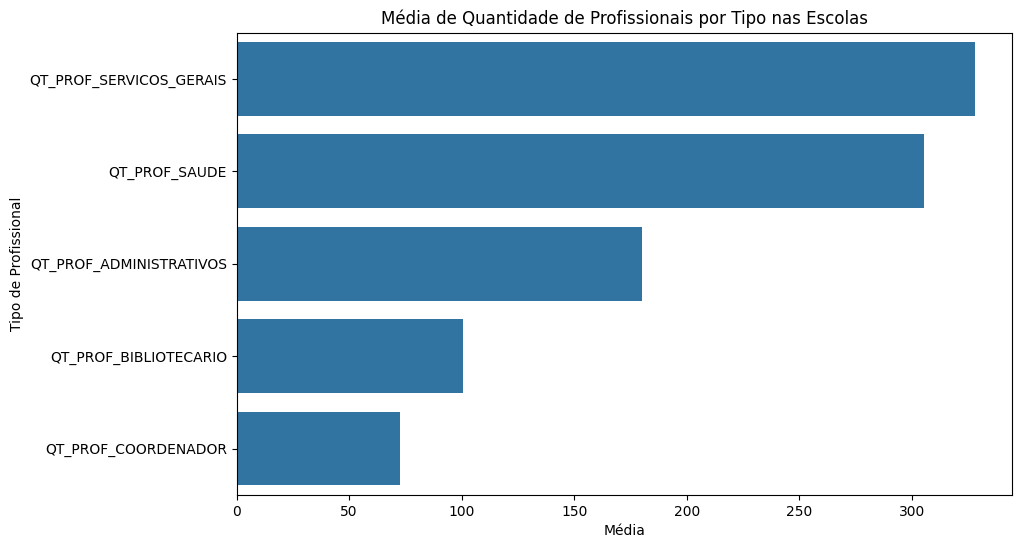

In [28]:
# ----------------------------------------
# 7. Quantidade de Profissionais por Tipo em cada Escola
# ----------------------------------------
profissionais_cols = [
    'QT_PROF_ADMINISTRATIVOS', 'QT_PROF_SERVICOS_GERAIS', 'QT_PROF_BIBLIOTECARIO',
    'QT_PROF_SAUDE', 'QT_PROF_COORDENADOR'
]

profissionais_summary = df_censo[profissionais_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=profissionais_summary.values, y=profissionais_summary.index)
plt.title('Média de Quantidade de Profissionais por Tipo nas Escolas')
plt.xlabel('Média')
plt.ylabel('Tipo de Profissional')
plt.show()

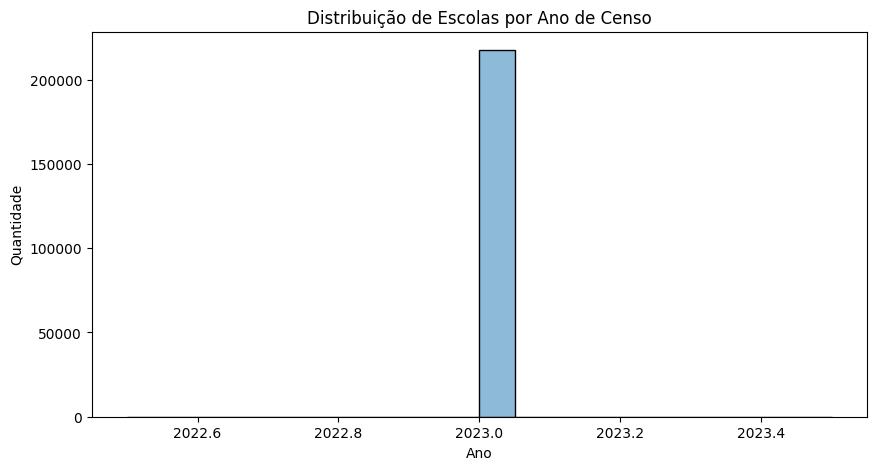

In [29]:
# ----------------------------------------
# 8. Escolas por Ano de Censo
# ----------------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df_censo['NU_ANO_CENSO'], bins=20, kde=True)
plt.title('Distribuição de Escolas por Ano de Censo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()